In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (12,12)

In [2]:
# def crop(img, ax0_min, ax0_max, ax1_min, ax1_max):
#     ax0_size = ax0_max - ax0_min
#     ax1_size = ax1_max - ax1_min
#     ax0_start = int(max(0, ax0_min - ax0_size*2))
#     ax1_start = int(max(0, ax1_min - ax1_size*2))
#     cropped = img[ax0_start: ax0_start + ax0_size *
#                   5, ax1_start: ax1_start + ax1_size*5]

In [3]:
filename = '../csv_detection_info/19_2, artrose.csv'
filename_clean = '../csv_detection_info_clean/19_2, artrose.csv'
saved_cropped_image = '//nmbu.no/LargeFile/Project/CubiAI/preprocess/cropped/19/2, artrose'

In [4]:
detection_df = pd.read_csv(filename)

In [5]:
detection_df

base_path  \
0    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
1    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
2    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
3    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
4    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
..                                                 ...   
128  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
129  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
130  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
131  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
132  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   

                                              filename  ax0_min  ax0_max  \
0    1.2.276.0.7230010.3.0.3.5.1.10548025.174082545...      727      856   
1    1.2.276.0.7230010.3.0.3.5.1.10820268.351918127...      698      846   
2    1.2.276.0.7230010.3.0.3.5.1.10820270.285506836...      774      920   
3    1.2.276.0.82.1.1.1430.1638344853.10.5.152.109....     3260     3434   
4    1.2.276.0.82.1.1.1430.168701517.192.168.1.129....     1115     1291   
..                                                 ...      ...      ...   
128  1.3.51.0.7.57388102.29798.24654.39843.41959.12...      889     1050   
129  1.3.51.0.7.676967463.21449.51531.44297.14760.4...     1058     1260   
130  1.3.51.0.7.687353338.50698.36942.33601.12640.3...      543      677   
131  1.3.51.0.7.805791942.54221.63815.43835.55365.4...      955     1160   
132  1.3.51.0.7.904308707.20444.21577.41540.11389.5...      752      900   

     ax1_min  ax1_max  confidence  year  diagnosis diagnosis_raw  
0       1010     1138    1.000000    19          2    2, artrose  
1       1328     1475    0.999999    19          2    2, artrose  
2       1392     1539    0.999996    19          2    2, artrose  
3       1749     1923    0.999996    19          2    2, artrose  
4       1422     1598    0.979769    19          2    2, artrose  
..       ...      ...         ...   ...        ...           ...  
128      453      614    1.000000    19          2    2, artrose  
129     1553     1755    0.998735    19          2    2, artrose  
130      752      886    0.728272    19          2    2, artrose  
131     1343     1548    0.999871    19          2    2, artrose  
132     1407     1555    0.999999    19          2    2, artrose  

[133 rows x 10 columns]

### [Optional] Sort by confidence (filter out bad prediction)

In [6]:
# detection_df = detection_df[detection_df.confidence > 0.5]

In [7]:
detection_df[detection_df.confidence < 0.5].index

Int64Index([11, 12, 23, 37, 38, 39, 40, 55, 63], dtype='int64')

Note that there is one case that is not good

### Look at the crop images

Are they reasonable, if not, mark the "weird", "wrong detected" image indice before saving it back to the clean folder

In [8]:
# plot every 9 of them

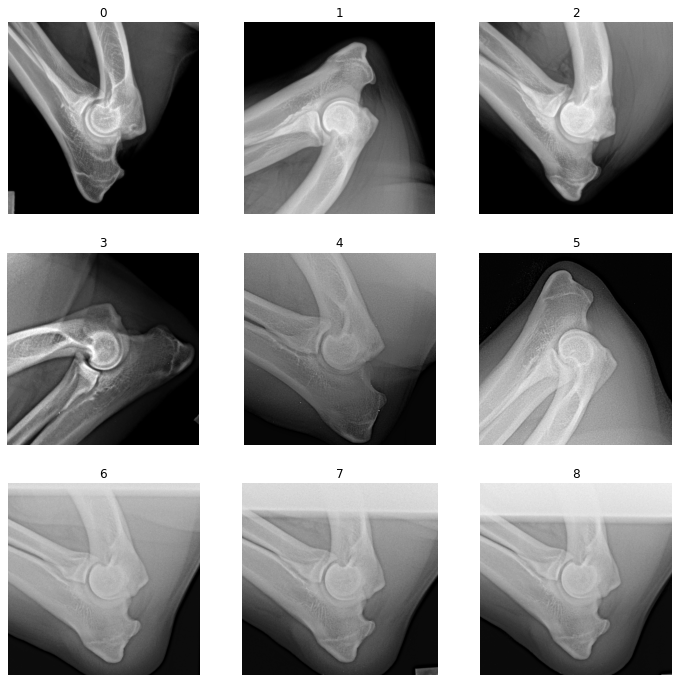

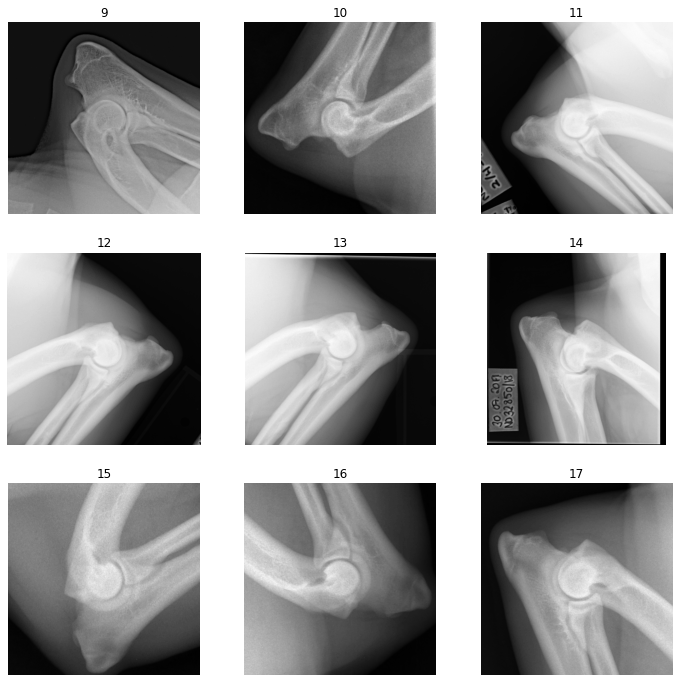

C:\NMBU\TEMP\ipykernel_11300\89006417.py:5: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
  plt.imshow(img, 'gray')
C:\NMBU\TEMP\ipykernel_11300\89006417.py:5: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.
  plt.imshow(img, 'gray')


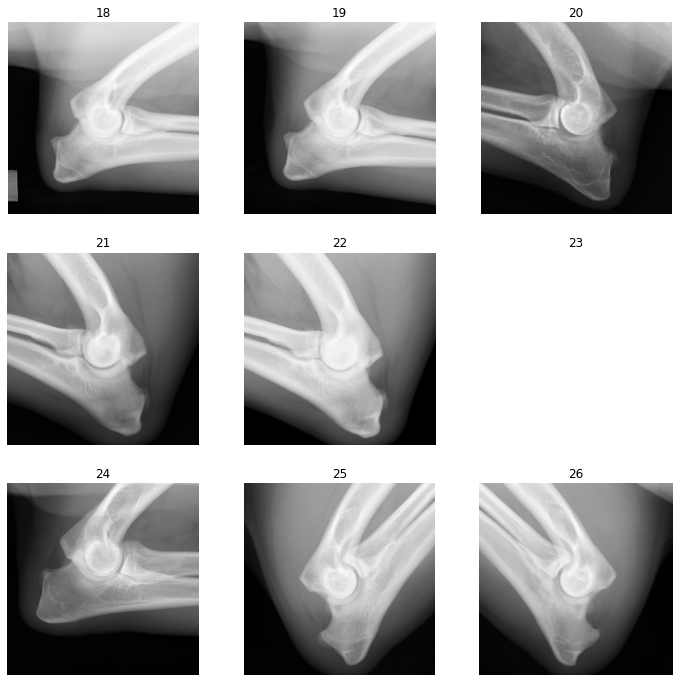

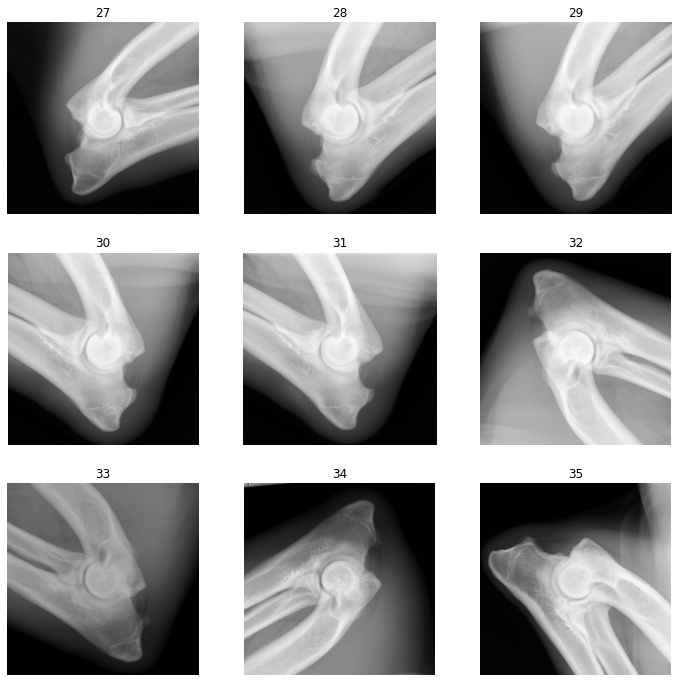

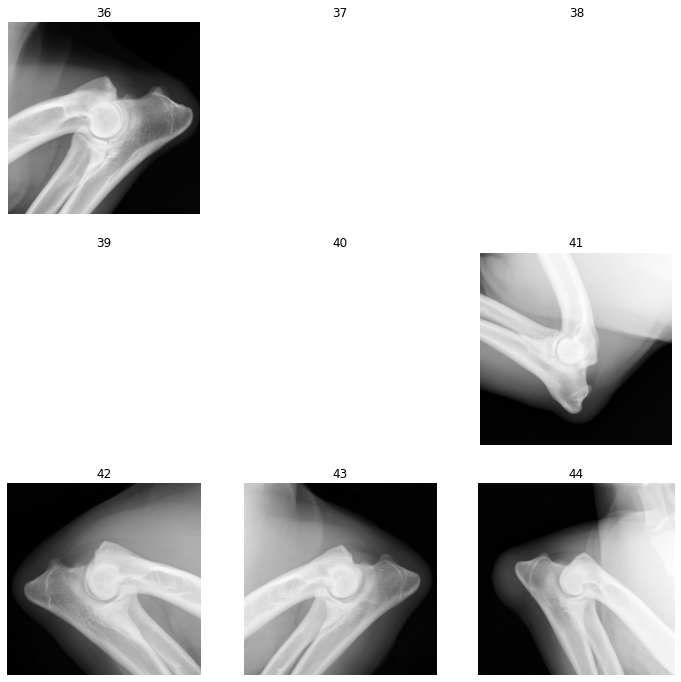

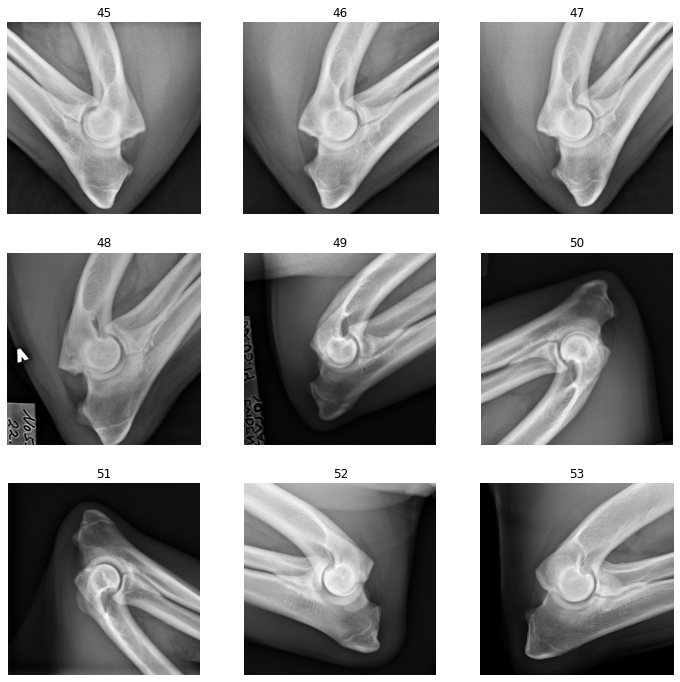

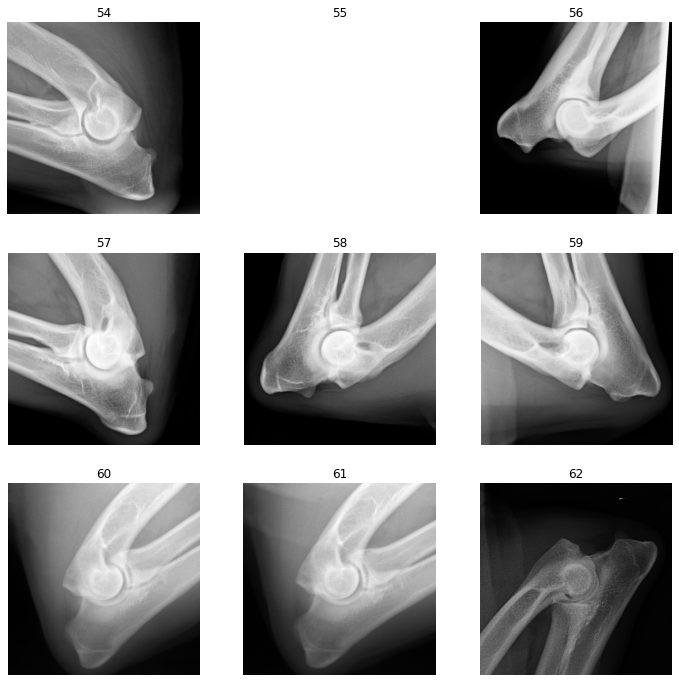

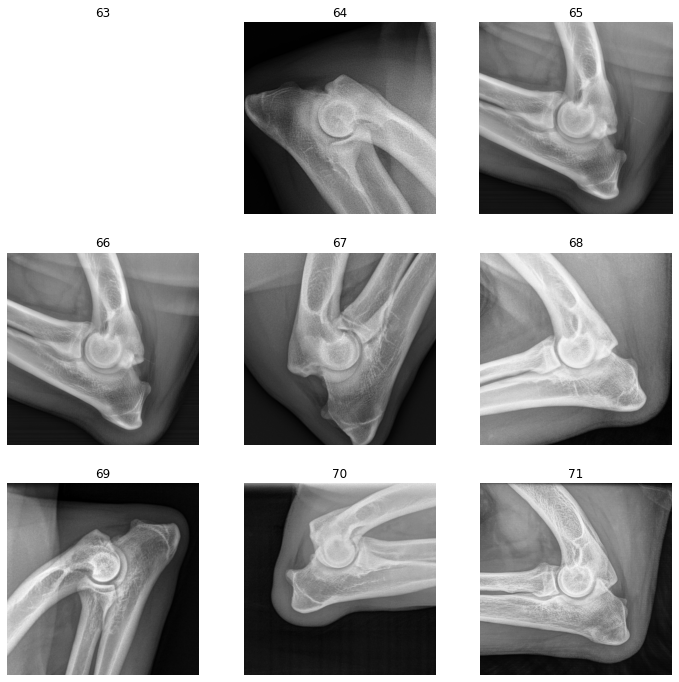

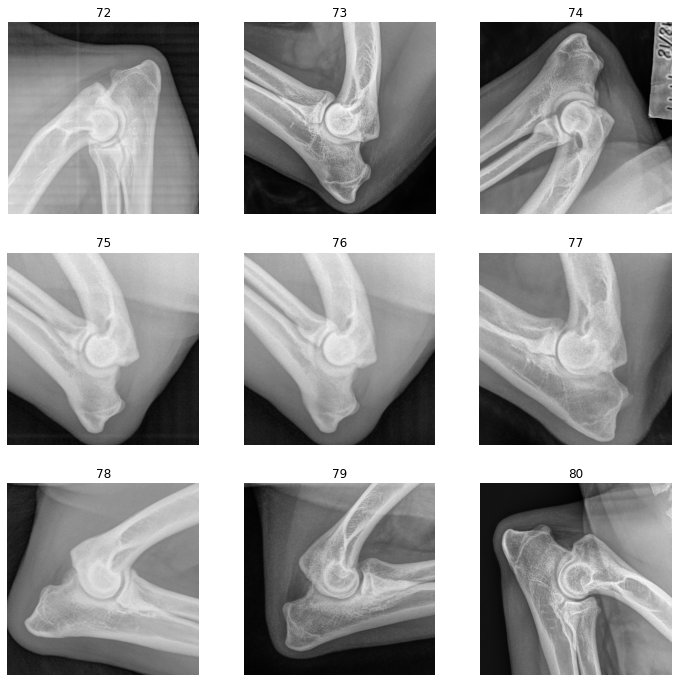

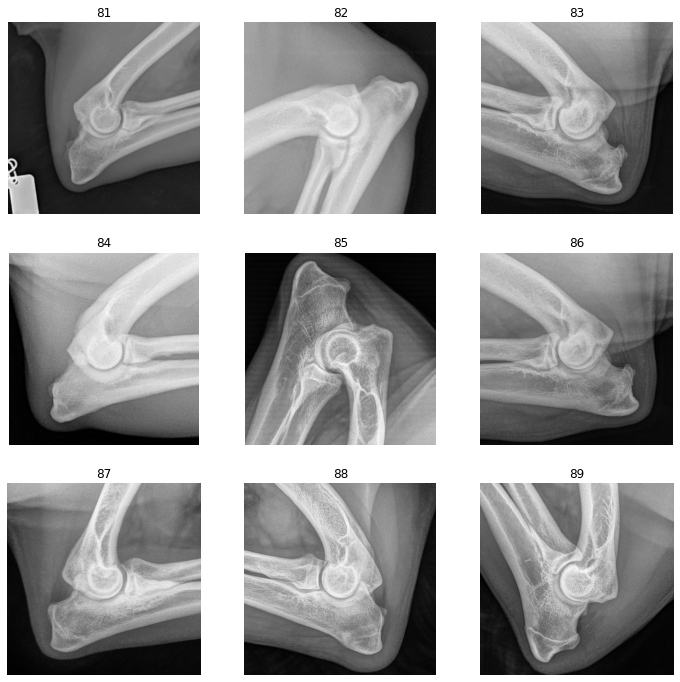

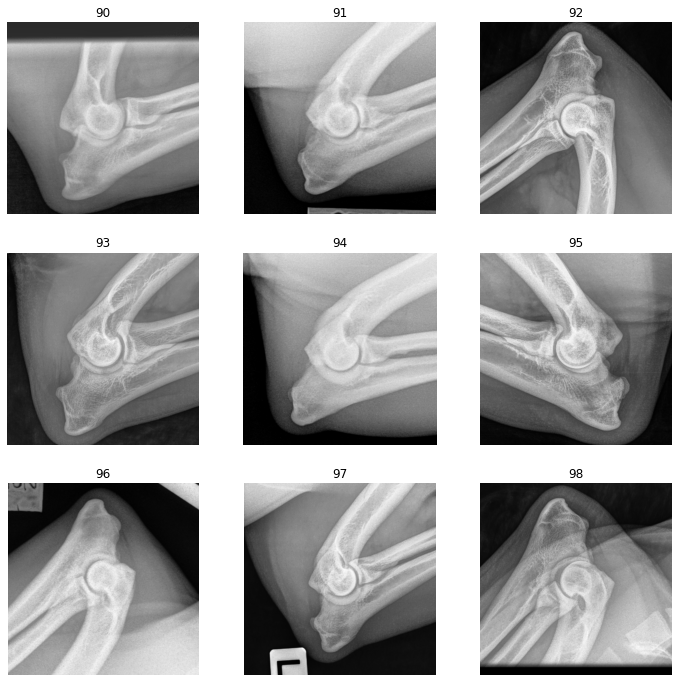

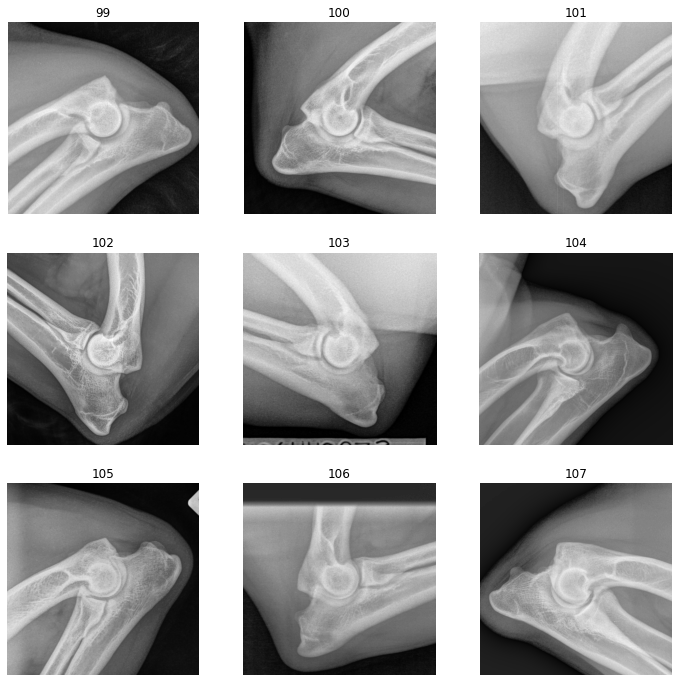

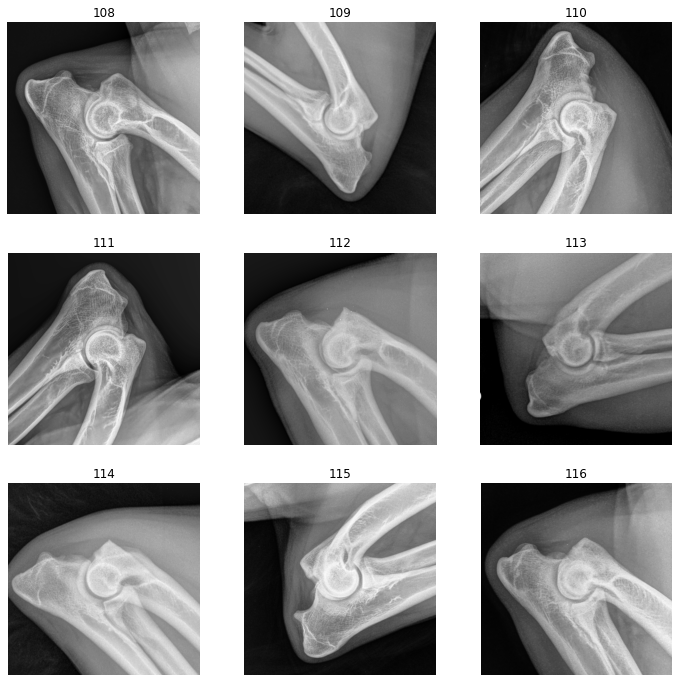

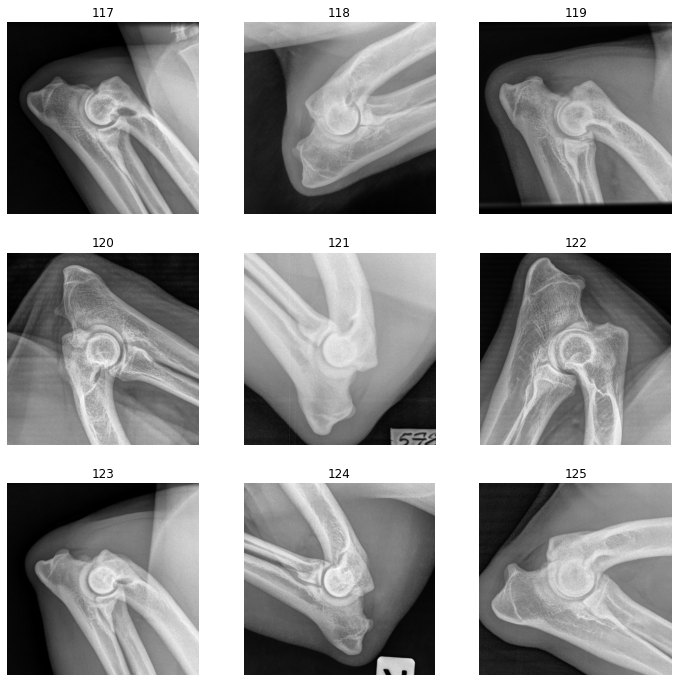

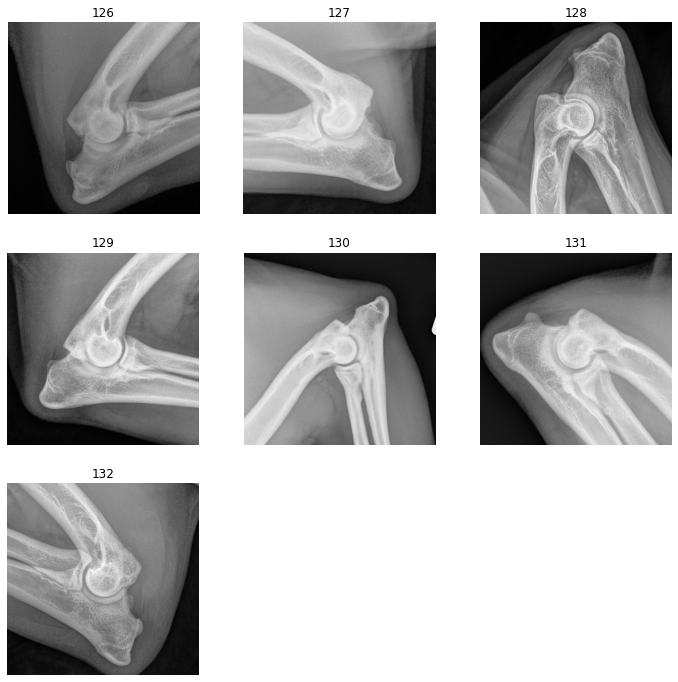

In [9]:
for id, item in detection_df.iterrows():
    fn = item['filename']
    img = np.load(saved_cropped_image + '/' + fn + '.npy')
    plt.subplot(3,3, (id%9) + 1)
    plt.imshow(img, 'gray')
    plt.axis('off')
    plt.title(str(id))
    
    if (id%9) == 8:
        plt.show()
        
plt.show()

## Remove bad detection items

In [10]:
remove_indice = [23,37,38,39,40,55,63]
detection_df[~detection_df.index.isin(remove_indice)]

base_path  \
0    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
1    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
2    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
3    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
4    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
..                                                 ...   
128  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
129  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
130  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
131  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
132  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   

                                              filename  ax0_min  ax0_max  \
0    1.2.276.0.7230010.3.0.3.5.1.10548025.174082545...      727      856   
1    1.2.276.0.7230010.3.0.3.5.1.10820268.351918127...      698      846   
2    1.2.276.0.7230010.3.0.3.5.1.10820270.285506836...      774      920   
3    1.2.276.0.82.1.1.1430.1638344853.10.5.152.109....     3260     3434   
4    1.2.276.0.82.1.1.1430.168701517.192.168.1.129....     1115     1291   
..                                                 ...      ...      ...   
128  1.3.51.0.7.57388102.29798.24654.39843.41959.12...      889     1050   
129  1.3.51.0.7.676967463.21449.51531.44297.14760.4...     1058     1260   
130  1.3.51.0.7.687353338.50698.36942.33601.12640.3...      543      677   
131  1.3.51.0.7.805791942.54221.63815.43835.55365.4...      955     1160   
132  1.3.51.0.7.904308707.20444.21577.41540.11389.5...      752      900   

     ax1_min  ax1_max  confidence  year  diagnosis diagnosis_raw  
0       1010     1138    1.000000    19          2    2, artrose  
1       1328     1475    0.999999    19          2    2, artrose  
2       1392     1539    0.999996    19          2    2, artrose  
3       1749     1923    0.999996    19          2    2, artrose  
4       1422     1598    0.979769    19          2    2, artrose  
..       ...      ...         ...   ...        ...           ...  
128      453      614    1.000000    19          2    2, artrose  
129     1553     1755    0.998735    19          2    2, artrose  
130      752      886    0.728272    19          2    2, artrose  
131     1343     1548    0.999871    19          2    2, artrose  
132     1407     1555    0.999999    19          2    2, artrose  

[126 rows x 10 columns]

In [11]:
new_detection_df = detection_df[~detection_df.index.isin(remove_indice)]

In [12]:
new_detection_df.to_csv(filename_clean, index=False)